In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
iris = datasets.load_iris()

In [15]:
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']



make a binary classification such that we only have two classes 0 and 1


We know that class setosa is at index 0, 1 is versicolar, and 2 is virginica.

Therefore we divide the classes into two, we select versicolar and virginica combining them into one class by discarding class 0: setosa and we will use probability since it is between 0 and 1 

In [16]:
idx = iris.target != 0
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

#we will use the ones below in our LogisticRegression which are the same as above. the difference is only in the naming.
y = target
X = data

we will have a look at the data before we work on it.

To make plotting simpler we select only two features (sepal width and sepal length both in centimetres

Text(0, 0.5, 'sepal width (cm)')

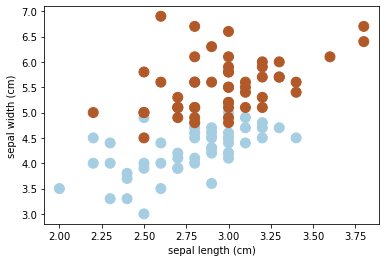

In [47]:
plt.scatter(data[:, 1], data[:, 2], c=target, cmap=plt.cm.Paired, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

Initiate the process of splitting he data into training and test sets

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

create a model and fit it

In [20]:
model = LogisticRegression()
model.fit(x_train, y_train) #training model

LogisticRegression()

In [37]:
predictions = model.predict(x_test)


In [36]:
cm = confusion_matrix(y_test, predictions)

array([[11,  1],
       [ 0,  8]], dtype=int64)

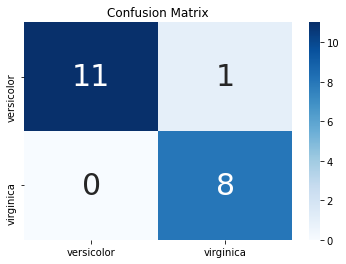

In [46]:

classes = iris.target_names[1:]
conf_mat = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)

#plot confusion matrix

import seaborn as sns
import pandas as pd

#confusion matrix sns heatmap

ax = plt.axes()

sns.heatmap(cm_df, annot=True, annot_kws={'size': 30}, fmt='d', cmap='Blues', ax = ax)
ax.set_title('Confusion Matrix')
plt.show()

Looking at the above matric confusion we can state that the model is likely to 
have a similar precision and recall

In [32]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))

0.95


In [38]:

print(predictions)

print()

print(classification_report(y_test, predictions))

[2. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1.]

              precision    recall  f1-score   support

         1.0       1.00      0.92      0.96        12
         2.0       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



we can conclude that our prediction is not off